In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

This script calculates the displacement vector fields between outlook and pph probability fields, using optical flow tracking algorithms

In [2]:
pph = xr.open_dataset('data/pph/labelled_pph.nc')
outlooks = xr.open_dataset('data/outlooks/grid_outlooks.nc')

In [13]:
test_date = '201905200000'
pph_array = pph.sel(time = test_date)['p_perfect_max'].data/100
outlook_array = outlooks.sel(time = test_date, outlook = 'Day 1')['prob'].data

In [21]:
flow = cv.calcOpticalFlowFarneback(outlook_array, pph_array, None, .5, 3, 1, 3, 7, 1.5, 0)


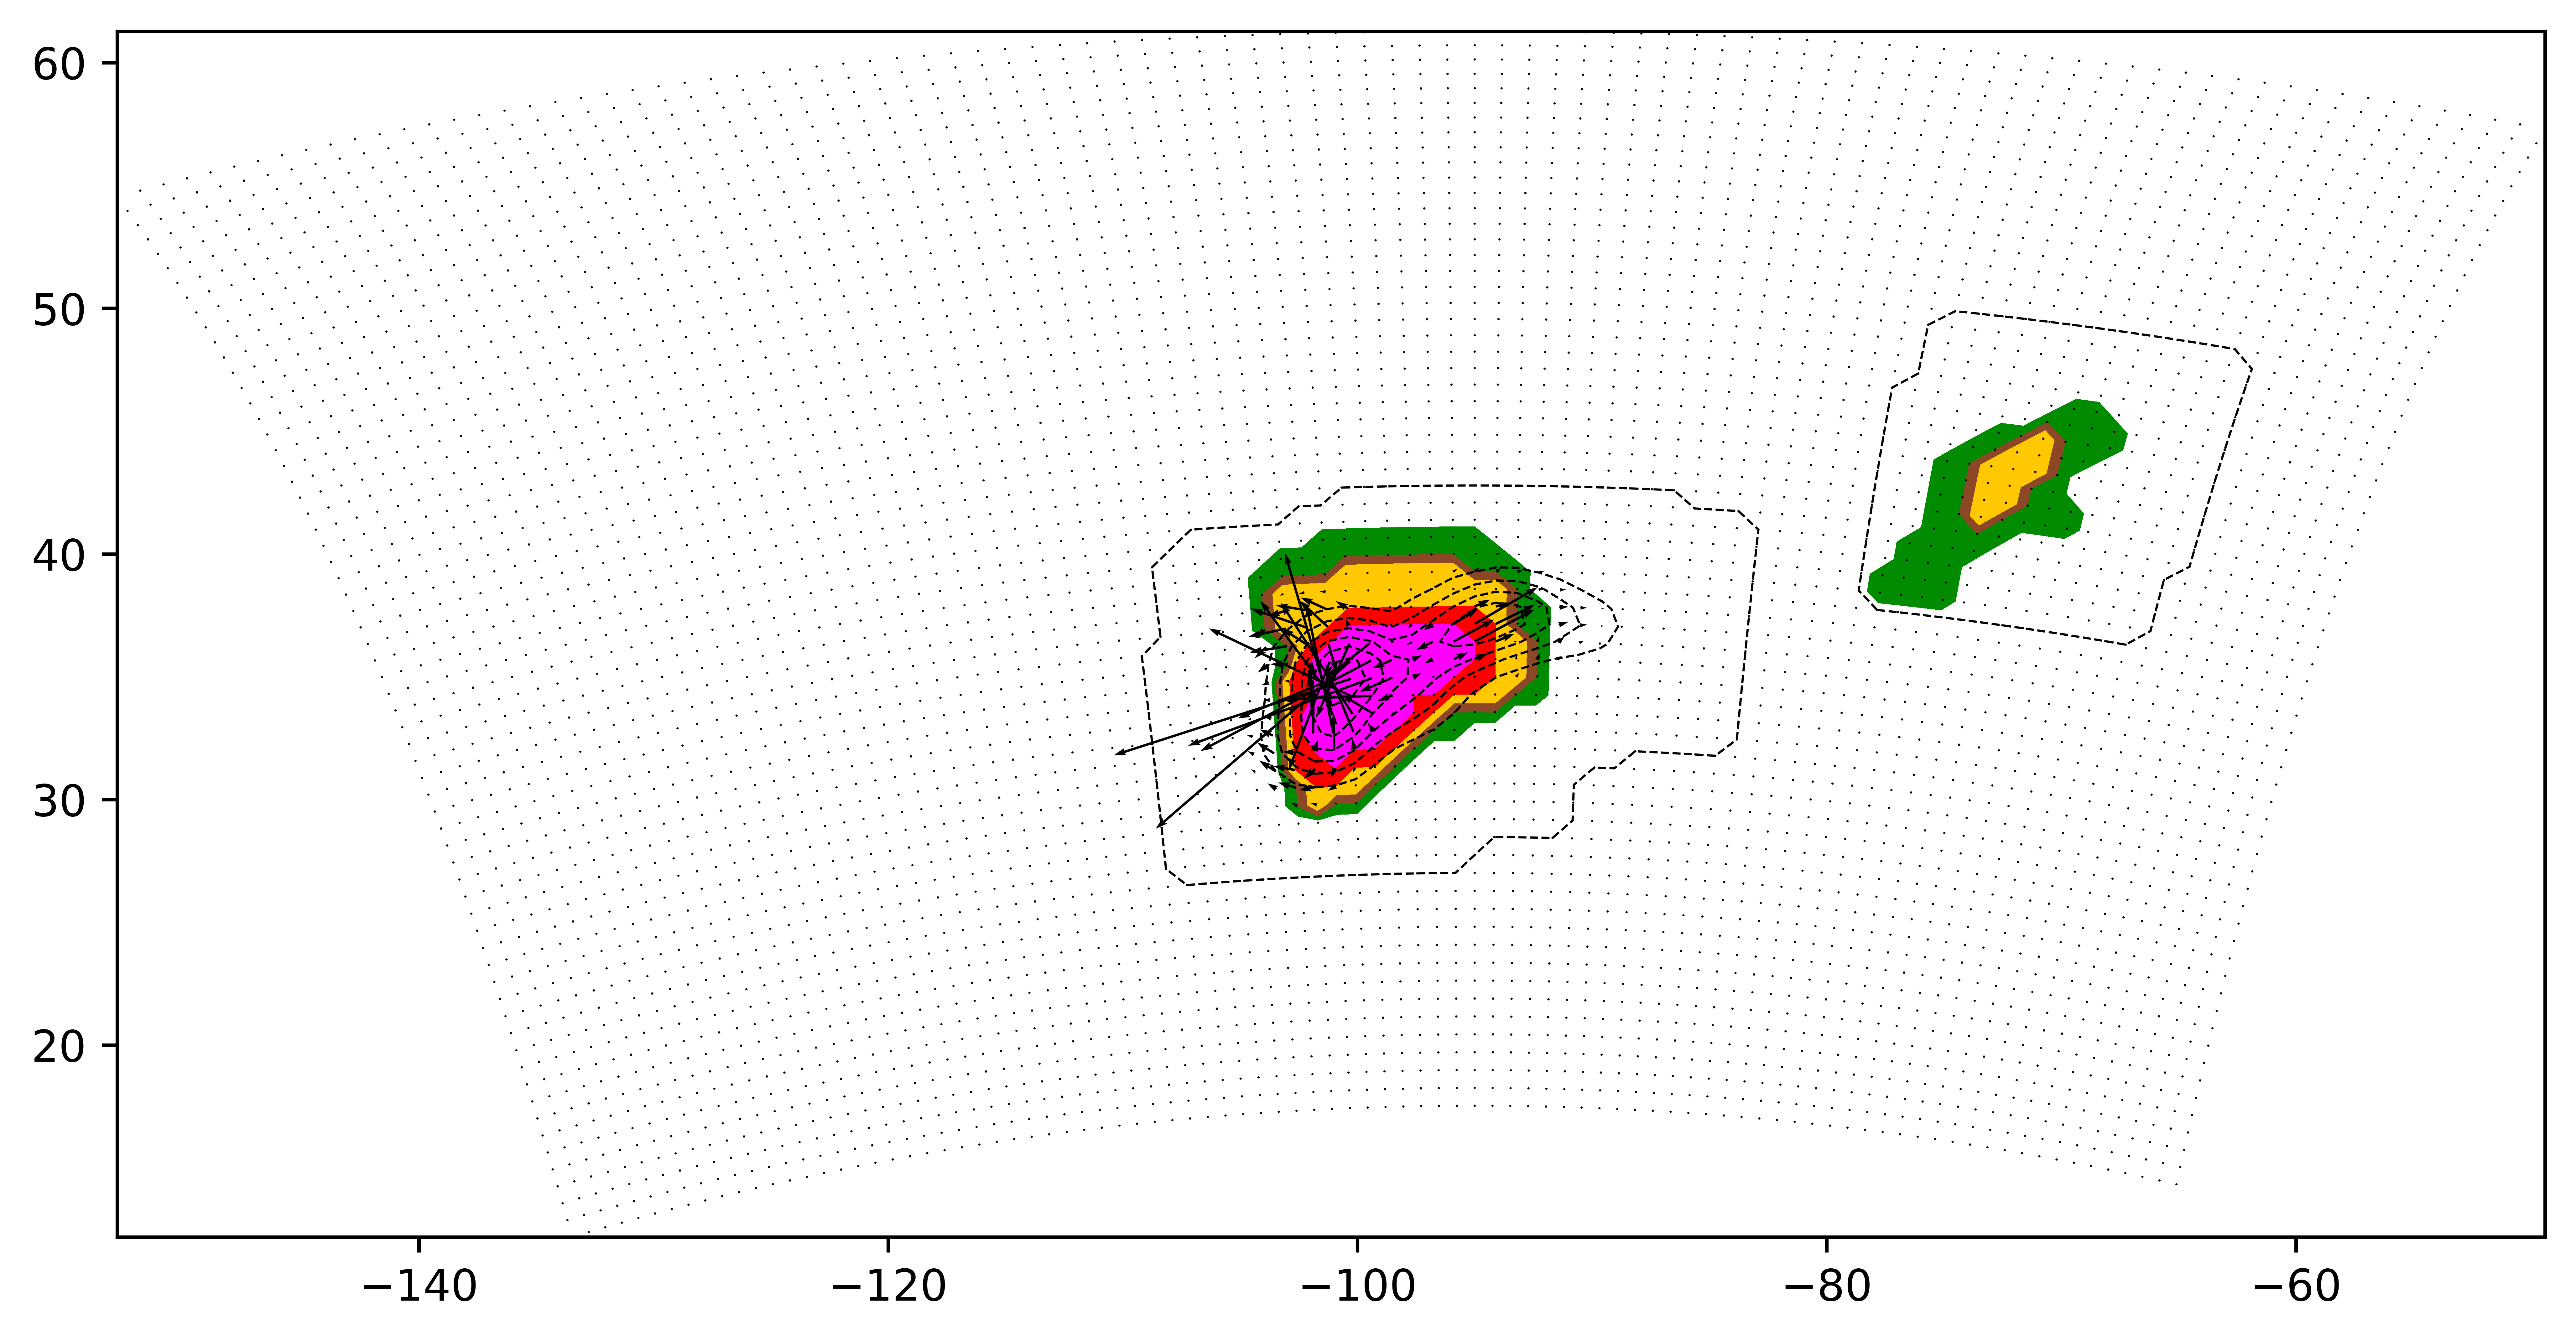

In [22]:
fig, ax = plt.subplots(figsize=(10, 5), dpi = 1000)
ax.contourf(pph.lon.values, pph.lat.values, outlook_array,
                    levels=[.02,.05,.10,.15,.30,.45,.60,1.00], colors=['#008b00','#8b4726','#ffc800', '#ff0000', '#ff00ff', '#912cee', '#104e8b'])
ax.contour(pph.lon.values, pph.lat.values, pph_array, colors = 'black', linestyles = 'dashed', linewidths = .5)
ax.quiver(pph.lon, pph.lat, flow[:, :, 0], flow[:, :, 1], scale = 1/1000, width = .001)